In [1]:
#Task 3: Using the Scikit-Learn Library, train the Logistic Regression model to classify Probe vs. Not Probe classes using all available features
import pandas
import sklearn
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

os.chdir('../../../../..')
os.chdir('/Users/shrin/Documents')
data = pd.read_csv('kddcup99_csv.csv')

# Display the number of rows and columns
num_rows, num_columns = data.shape

# Print the number of rows
print("Number of Rows:", num_rows)

# Assuming 'data' is your DataFrame
# Replace 'label_column_offset', 'protocol_type_offset', 'service_offset', 'flag_offset' with the actual offsets
label_column_offset = 41
protocol_type_offset = 1
service_offset = 2
flag_offset = 5

# Features
X = data.iloc[:, :label_column_offset]  # Use offsets for features
# Labels
y = data.iloc[:, label_column_offset]  # Use offset for labels

# Define column offsets for one-hot encoding
categorical_offsets = [protocol_type_offset, service_offset, flag_offset]

# One-hot encode categorical features only for 'protocol_type', 'service', 'flag'
X_categorical = pd.get_dummies(X[X.columns[categorical_offsets]], columns=X.columns[categorical_offsets])

# Combine one-hot encoded categorical features with non-categorical features
X_encoded = pd.concat([X.iloc[:, :protocol_type_offset], X_categorical, X.iloc[:, flag_offset+1:]], axis=1)

# Define 'Probe' class based on specified values
probe_values = ['ipsweep', 'nmap', 'portsweep', 'satan']
y_binary = y.isin(probe_values).astype(int)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Apply RandomUnderSampler to balance class distribution
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(C=100.0, random_state=3, solver='lbfgs', multi_class='ovr')
model.fit(X_train_scaled, y_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_output)

"""Overall we see that the model appears to have high accuracy, but the precision for class 1 is relatively low. 
"""

Number of Rows: 494020
Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     97970
           1       0.54      0.99      0.70       834

    accuracy                           0.99     98804
   macro avg       0.77      0.99      0.85     98804
weighted avg       1.00      0.99      0.99     98804


'Overall we see that the model appears to have high accuracy, but the precision for class 1 is relatively low. \n'

C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1246, in fit
    raise Valu

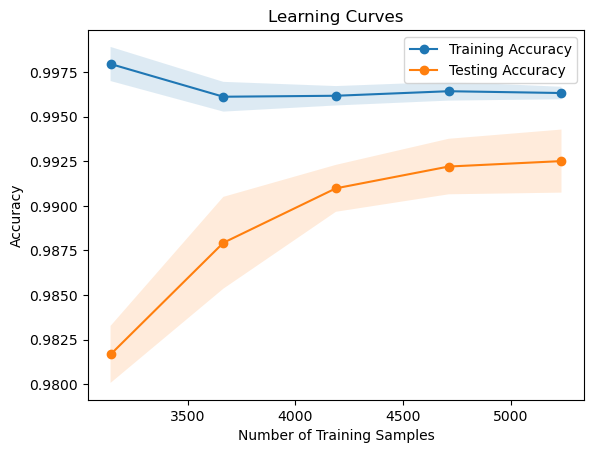

'Overall we see that the model appears to have high accuracy, but the precision for class 1 is relatively low. \n'

In [53]:
# As we can see above, the accuracy is 99%. Even after balancing, there are more false positives for class 1 than 0. 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

# Assuming 'model' is your logistic regression model
# Assuming 'X_train_scaled', 'y_resampled', 'X_test_scaled', and 'y_test' are your training and testing data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_resampled, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)

plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

""" Task 4: 
When the sample size is 4500 the learning curve seems to converge on the Accuracy. 
Testing accuracy is increasing, which is not indicative of overfitting. Furthermore, I have a high training accuracy, so it's not underfitting either. I have reached a plateau in terms of learning. 
"""

Top Features with Largest Absolute Coefficients:
                           Feature  Coefficient
10818                diff_srv_rate     4.513980
10825  dst_host_srv_diff_host_rate     4.216853
10812                    srv_count     4.208269
10822       dst_host_same_srv_rate     3.677042
10817                same_srv_rate     3.367438
Top 10 Features with Largest Absolute Coefficients:
                           Feature  Coefficient
10818                diff_srv_rate     4.513980
10825  dst_host_srv_diff_host_rate     4.216853
10812                    srv_count     4.208269
10822       dst_host_same_srv_rate     3.677042
10817                same_srv_rate     3.367438
10824  dst_host_same_src_port_rate     2.631857
10796               wrong_fragment     2.322528
10800                    logged_in     2.231546
10826         dst_host_serror_rate     2.113831
10813                  serror_rate     1.582229


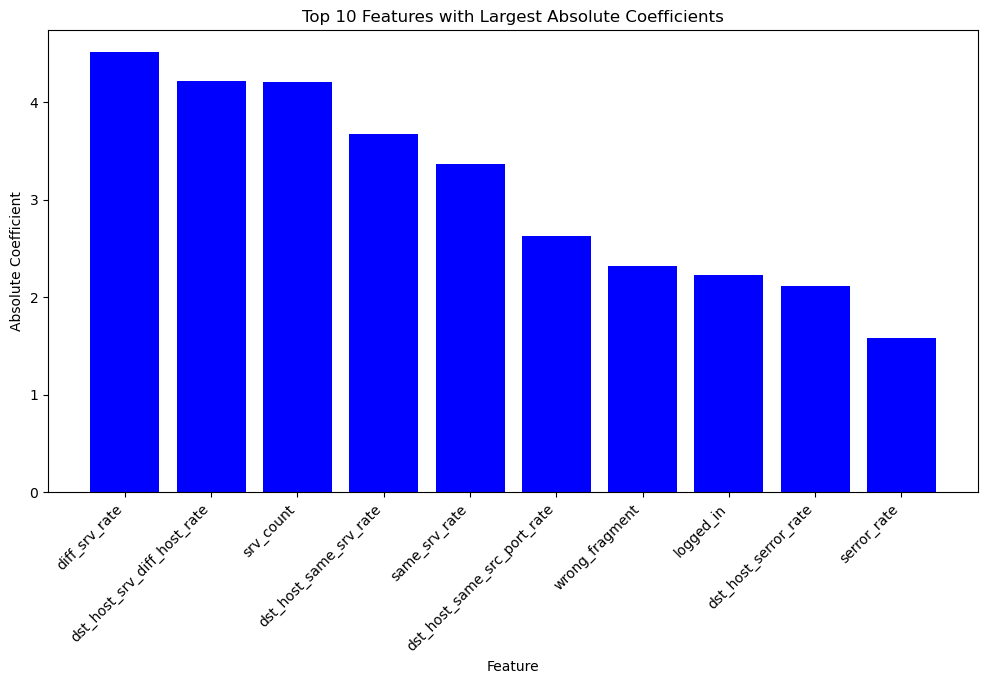

In [48]:
# Task 5, we create a bio-graph and show which features have the largest weights. 
import numpy as np

# Get the coefficients from the trained logistic regression model
coefficients = model.coef_[0]

# Get the absolute values of the coefficients
absolute_coefficients = np.abs(coefficients)

# Create a DataFrame to display feature names and their absolute coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': absolute_coefficients
})

# Sort the DataFrame by absolute coefficients in descending order
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Display the top features with the largest absolute coefficients
print("Top Features with Largest Absolute Coefficients:")
print(feature_coefficients.head())

# Display the top 10 features with the largest absolute coefficients
top_10_features = feature_coefficients.head(10)
print("Top 10 Features with Largest Absolute Coefficients:")
print(top_10_features)

import matplotlib.pyplot as plt

# Plotting the top features with the largest absolute coefficients
plt.figure(figsize=(12, 6))
plt.bar(top_10_features['Feature'], top_10_features['Coefficient'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Top 10 Features with Largest Absolute Coefficients')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

""" Task 5: 
#    diff_srv_rate:
        This feature may be important because it measures the difference in service rate between the source and destination hosts. In the context of a "probe" vs. "not probe" classification, the rate at which different services are used may significantly differ between the two classes.

    dst_host_srv_diff_host_rate:
        This feature could be crucial as it measures the rate of different services per destination host. The variation in services used across different destination hosts might be indicative of certain behaviors associated with the "probe" class.

    srv_count:
        The number of connections (srv_count) might be an essential feature because the behavior of probing activities may involve a different pattern or frequency of establishing connections compared to non-probing activities.

    dst_host_same_srv_rate:
        This feature measures the rate of connections to the same service among all connections to the same destination host. In the context of probing activities, there might be a distinct pattern in the rate of using the same service across different destination hosts.
        
    In summary, these features may capture specific behaviors or patterns associated with probing activities that distinguish them from non-probing activities.
"""

C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1221, in fit
    self.coef_

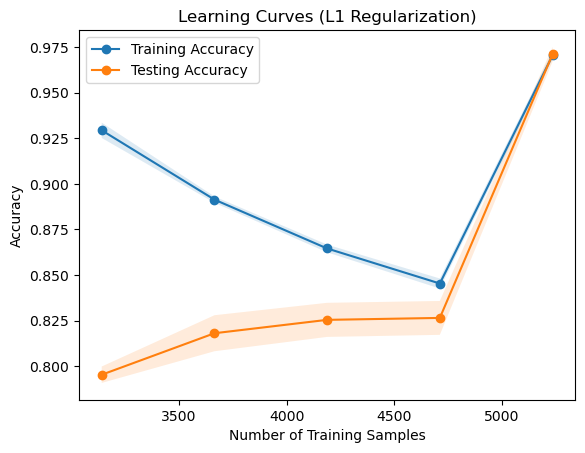

C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shrin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1246, in fit
    raise Valu

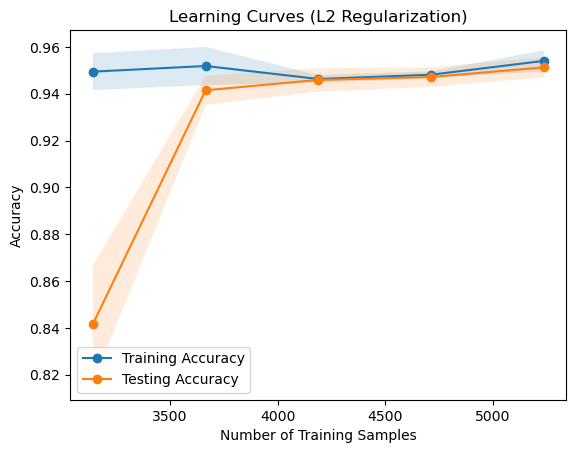

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'X_train_scaled', 'y_resampled', 'X_test_scaled', and 'y_test' are your training and testing data

# Apply RandomUnderSampler to balance class distribution
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train_scaled, y_resampled)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test_scaled)

# Define logistic regression models with L1 and L2 regularization
model_l1 = LogisticRegression(C=0.001, penalty='l1', solver='liblinear', multi_class='ovr', random_state=42, max_iter=1000)
model_l2 = LogisticRegression(C=0.001, penalty='l2', solver='lbfgs', multi_class='ovr', random_state=42, max_iter=1000)

# Function to plot learning curves
def plot_learning_curves(model, X, y, title):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)

    plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot learning curves for L1 regularization
plot_learning_curves(model_l1, X_resampled_scaled, y_resampled, 'Learning Curves (L1 Regularization)')

# Plot learning curves for L2 regularization
plot_learning_curves(model_l2, X_resampled_scaled, y_resampled, 'Learning Curves (L2 Regularization)')


In [ ]:
""" Task 6 and 7
Having a learning are of 0.001 has worked well for my C1 and C2 models. A small learning rate allows the optimization algorithm to take small steps during each iteration. This can be beneficial in cases where the objective function has a lot of local minima or is highly irregular, as it helps the algorithm converge more slowly and avoid overshooting the optimal values.
In L1 regularization, the penalty term added to the loss function is the absolute sum of the coefficients (weights) of the model.
It tends to enforce sparsity in the learned weights, meaning some of the coefficients become exactly zero. As a result, L1 regularization can be useful for feature selection by effectively removing less important features.
In L2 regularization, the penalty term added to the loss function is the squared sum of the coefficients.
It penalizes large weights but doesn't force them to be exactly zero. Instead, it encourages smaller weights for all features.

Since some of the Features have a large coefficients, it makes sense that L1 regularization has a better accuracy. 
"""